In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('https://talentcocomedia.s3.amazonaws.com/ml-assets/heart-disease.csv')


In [3]:
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
y = df['target']


In [5]:
y.head()


0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [6]:
x = df.drop('target',axis=1)


In [7]:
x.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)


In [9]:
print(x_train.shape)


(212, 13)


In [10]:
print(y_train.shape)


(212,)


In [11]:
print(y_test.shape)


(91,)


##Logistic Regression - GridSearchCV


In [12]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

lr_model = LogisticRegression(penalty='l2')

val = list(np.arange(1, 100, 1))

parameters = {'solver':('newton-cg', 'liblinear', 'sag', 'saga'), 'C':val}

clf_lr = GridSearchCV(lr_model, parameters)
clf_lr.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means 

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                               15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
                               27, 28, 29, 30, ...],
                         'solver': ('newton-cg', 'liblinear', 'sag', 'saga')})

In [13]:
print(clf_lr.best_params_)


{'C': 1, 'solver': 'liblinear'}


In [14]:
test_pred = clf_lr.predict(x_test)


In [15]:
acc_lr_gs = accuracy_score(test_pred,y_test)
acc_lr_gs

0.7912087912087912

Previously we had got an accuracy of 72.52%

but now it is improved to 83.51%

##KNeighborsClassifier - GridSearchCV


In [16]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier()

val = list(np.arange(1,10, 1))

parameters = {'n_neighbors':val}

clf_knn = GridSearchCV(neigh, parameters)
clf_knn.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [17]:
print(clf_knn.best_params_)


{'n_neighbors': 9}


In [18]:
test_pred_knn = clf_knn.predict(x_test)


In [19]:
accuracy_knn_gs = accuracy_score(test_pred_knn, y_test)
accuracy_knn_gs
     

0.6043956043956044

##KNeighborsClassifier - GridSearchCV


In [20]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier()

val = list(np.arange(1,10, 1))

parameters = {'n_neighbors':val}

clf_knn = GridSearchCV(neigh, parameters)
clf_knn.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [21]:
print(clf_knn.best_params_)


{'n_neighbors': 9}


In [22]:
test_pred_knn = clf_knn.predict(x_test)


In [23]:
accuracy_knn_gs = accuracy_score(test_pred_knn, y_test)
accuracy_knn_gs
     

0.6043956043956044

previously we had got an accuracy score of 61.53%

but now it is improved to 63.73%

#DecisionTreeClassifier - GridSearchCV


In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [25]:
clf = DecisionTreeClassifier(random_state=1024)

param_grid = {
              'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : np.arange(1,10,1),
              'criterion' :['gini', 'entropy']
             }

clf_dtc = GridSearchCV(clf, param_grid=param_grid, cv=5, verbose=True)

clf_dtc.fit(x_train, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1024),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=True)

In [26]:
print(clf_dtc.best_params_)


{'ccp_alpha': 0.01, 'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto'}


In [27]:
test_pred_dtc = clf_dtc.predict(x_test)


In [28]:
accuracy_dtc_gs = metrics.accuracy_score(y_test, test_pred_dtc)
accuracy_dtc_gs

0.7472527472527473

#CONFUSION MATRIX


since we got a accuracy of 80% using Linear-Regression, we use its predicted accuracy to find the confusion matrix

#Logistic Regression


In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_pred,y_test)

array([[25,  3],
       [16, 47]])

In [30]:
from sklearn.metrics import classification_report

print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.89      0.61      0.72        41
           1       0.75      0.94      0.83        50

    accuracy                           0.79        91
   macro avg       0.82      0.77      0.78        91
weighted avg       0.81      0.79      0.78        91



#KNeighborsClassifier

In [31]:
confusion_matrix(test_pred_knn,y_test)


array([[22, 17],
       [19, 33]])

In [32]:
print(classification_report(y_test,test_pred_knn))


              precision    recall  f1-score   support

           0       0.56      0.54      0.55        41
           1       0.63      0.66      0.65        50

    accuracy                           0.60        91
   macro avg       0.60      0.60      0.60        91
weighted avg       0.60      0.60      0.60        91



#DecisionTreeClassifier


In [33]:
confusion_matrix(test_pred_dtc,y_test)


array([[27,  9],
       [14, 41]])

In [34]:
print(classification_report(y_test,test_pred_dtc))


              precision    recall  f1-score   support

           0       0.75      0.66      0.70        41
           1       0.75      0.82      0.78        50

    accuracy                           0.75        91
   macro avg       0.75      0.74      0.74        91
weighted avg       0.75      0.75      0.75        91



From the above comparisions we come to a conclusion that DecisionTreeClassifier provides a better Recall along with accuracy when compared to other Modals



#To Plot a Graph of Receiver Operating Characteristic Curve (ROC) with FPR at the x axis and TPR at the y axis and to find the roc_auc score


In [35]:
prob_lr = clf_lr.predict_proba(x_test)
prob_knn = clf_knn.predict_proba(x_test)
prob_dtc = clf_dtc.predict_proba(x_test)

In [36]:
prob_lr =  prob_lr[:, 1]
prob_knn = prob_knn[:, 1]
prob_dtc = prob_dtc[:, 1]

In [37]:

from sklearn.metrics import roc_curve

fpr_lr, tpr_lr, thresh_lr = roc_curve(y_test, prob_lr)
fpr_knn, tpr_knn, thresh_knn = roc_curve(y_test, prob_knn)
fpr_dtc, tpr_dtc, thresh_dtc = roc_curve(y_test, prob_dtc)

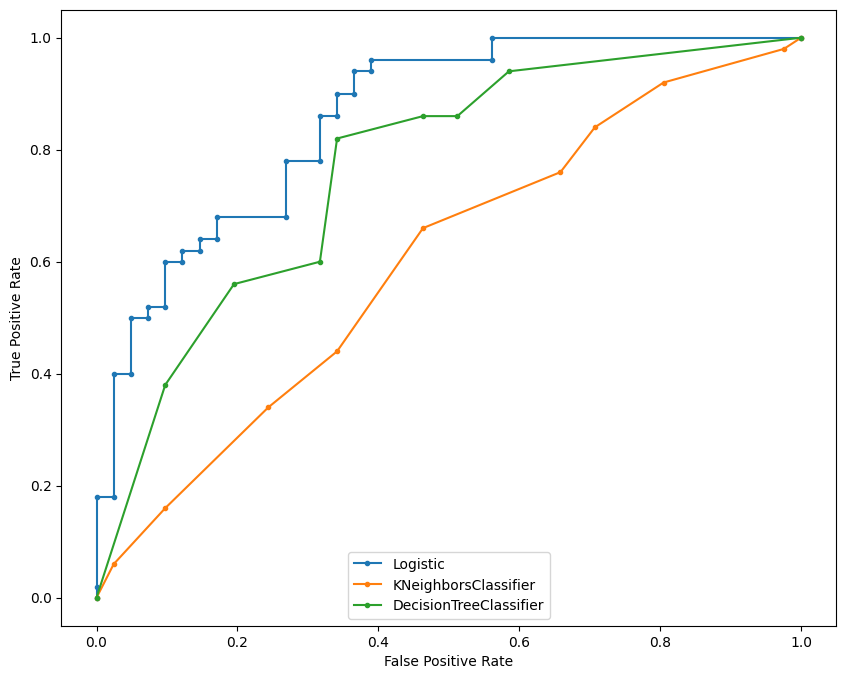

In [38]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,8))
ax.plot(fpr_lr, tpr_lr, marker='.', label='Logistic')
ax.plot(fpr_knn, tpr_knn, marker='.', label='KNeighborsClassifier')
ax.plot(fpr_dtc, tpr_dtc, marker='.', label='DecisionTreeClassifier')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc=8)

plt.show()

From the above Graph we can clearly interpreted that the AREA under the LOGISTIC curve is more than the other two curves and which provides a better accuracy over the other two curves

Apparantly we can also check the roc_auc_score using the below module

In [39]:
from sklearn.metrics import roc_auc_score

auc_lr = roc_auc_score(y_test, prob_lr)
auc_knn = roc_auc_score(y_test, prob_knn)
auc_dtc = roc_auc_score(y_test, prob_dtc)

print(f'Logistic : ROC AUC = {round(auc_lr, 3)*100} %')
print(f'Logistic : ROC AUC = {round(auc_knn, 3)*100} %')
print(f'Logistic : ROC AUC = {round(auc_dtc, 3)*100} %')

Logistic : ROC AUC = 85.8 %
Logistic : ROC AUC = 60.0 %
Logistic : ROC AUC = 76.5 %


The roc_auc_score of LogisticRegression is 93.1% which is much greater than the other two



#Code to allow user to query by providing details of a patient as input and determining whether the patient lives or dies

In [40]:
from pandas.core.window.expanding import ExpandingGroupby
from matplotlib.projections.polar import ThetaAxis
n = int(input("Enter no of Patients who's Status is to be Determined :- "))

def Prediction() :
  age = int(input("Age of the Patient :- "))
  sex = int(input("Sex of the Patient (0 - female & 1 - male) :- "))
  cp = int(input("Chest Pain Type :- "))
  trestbps = int(input("Resting Blood Pressure :- "))
  chol = int(input("Serum Cholestrol :- "))
  fbs = int(input("Fasting Blood Sugar :- "))
  restecg = int(input("Resting ElectroCardiographic Result :- "))
  thalach = int(input("Maximum Heart Rate Achieved :- "))
  exang = int(input("Exercise-include angina (1 - True, 0 - False) :- "))
  oldpeak = float(input("ST Depression induced by Exercise relative to Rest :- "))
  slope = int(input("Slope of Peak Exercise ST segment :- "))
  ca = int(input("No. of Major Vessels (0-3) :- "))
  thal = int(input("Thalasemia Indicator :- "))
  new_patient = np.array([age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal])

  new_patient = new_patient.reshape(1,-1) #converting to 2D array

  if clf_lr.predict(new_patient) == 0 :
    return "The Patient with the above provided Vitals Dies!!!"
  else :
    return "The Patient with the above provided vitals Lives!!!"

for i in range(n) :
  print(Prediction())

Enter no of Patients who's Status is to be Determined :- 1
Age of the Patient :- 60
Sex of the Patient (0 - female & 1 - male) :- 1
Chest Pain Type :- 3
Resting Blood Pressure :- 150
Serum Cholestrol :- 33
Fasting Blood Sugar :- 50
Resting ElectroCardiographic Result :- 0
Maximum Heart Rate Achieved :- 150
Exercise-include angina (1 - True, 0 - False) :- 0
ST Depression induced by Exercise relative to Rest :- 2.3
Slope of Peak Exercise ST segment :- 0
No. of Major Vessels (0-3) :- 0
Thalasemia Indicator :- 1
The Patient with the above provided Vitals Dies!!!


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
